# **Apresentação do problema**

O conjunto de dados apresentado nesse **MVP** é **sobre câncer de mama** e nos fornece informações detalhadas sobre os pacientes que tiverem seu diagnóstico positivado para o câncer. Alem de um **ID** para cada paciente e o tipo de câncer (**maligno** ou **benigno**), temos também as **características visuais médias do tumor** de cada paciente.

O objetivo é que o modelo seja o mais assertivo possível no diagnóstico da doença.
Ou seja, temos um **problema** de **CLASSIFICAÇÃO** para resolver ;)

# **Apresentação do dataset**

As principais características do dataset são:

**id**: Identificação única de cada paciente.

**diagnosis**: Tipo de câncer, podendo ser "M" (**Maligno**) ou "B" (**Benigno**).

**Características médias**: Incluem valores médios de medidas como raio, textura, perímetro, área, suavidade, compacidade, concavidade e pontos côncavos do tumor.
Além disso, o dataset contém características categóricas que associam pacientes a valores numéricos específicos, organizados em tabelas que indicam a distribuição dos valores em diferentes intervalos. Essas tabelas facilitam a análise e visualização.

# **Imports**

O **MVP** utiliza as bibliotecas: **sklearn**, **numpy**, **pandas** e **matplotlib**

In [210]:
# imports necessario para carga de dados da uma url git para um dataframe
import pandas as pd

#imports necessarios para:
# separação em bases de treino e teste (holdout)
# criação os folds para a validação cruzada
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada

#imports necessarios para:
# modelagem
# avaliação de modelos
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
#incluir uma regressão linear multipla e multivarivel

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier


# **Carga de dados e seleção de atributos**

**Base dos dados**: https://raw.githubusercontent.com/guiagb/ml-analytics-cancer-model/develop/cancer.csv

Exibimos o** tipo dos dados** para **validar** se o input da base de dados e a leitura dela pelo pd.read_csv **capturou** os valores e os tipos de **forma** **correta**, para que evite erros futuros de tratativas de dados e que contribua para uma performance melhor do treinamento do modelo.


In [211]:
# url a importar
url_dados = 'https://raw.githubusercontent.com/guiagb/ml-analytics-cancer-model/develop/cancer.csv'

# labels dos atributos do dataset
labels_atributos = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

# carga do dataset através da url do github
dados_cancer = pd.read_csv(url_dados, names=labels_atributos)
print(type(dados_cancer))

# dados_cancer.columns
# dados_cancer.describe()
dados_cancer.info() # exibe as colunas e os tipos de dados de cada uma delas

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null   

# **Identificando o variavel do diagnostico (categorica)**

Com base nos labels inseridos no data frame foi utilizado o .dtype que **captura** no **loop** o tipo dos dados de cada label para verificar se temos somente 1 tipo de **variável** **categorica** e essa que será removida no futuro

In [212]:
# find categorical variables

categorical = [var for var in dados_cancer.columns if dados_cancer[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['diagnosis']


# **Display dos 5 primeiros dados**

**Validando** abaixo se as **5 primeiras linhas** do dataframe **apresentam** todas as colunas desejadas e respectivamente os** labels e valores**. Nesse momento é interessante ver que temos dados não normalizados, em difrentes escalas

In [213]:
# exibe as 5 primeiras linhas
dados_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Verificando se há valores faltantes

Observado que não há valores faltantes no dataset

In [214]:
print("Verificando valores ausentes:")
print(dados_cancer.isnull().sum())

Verificando valores ausentes:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# **Entendendo os atributos**

No precesso de **entendimento do dataset**, capturo o **count, mean, std, min, percentils e max** com o **objetivo** de começar a **identificar desvios** e principalmente os primeiros apontamentos de **outliers** que possam impactar na assertividade do modelo.

In [215]:
dados_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Capturando Outliers**

Para **melhorar** a **visualização** dos **outliers**, utilizo o subplpots com o auxilio de um loop que pega atributo a atributo e **plota** de** forma visual** sobre como em um mesmo atributo temos **valores** **distantes** ou mais próximos um dos outros. Isso facilita para uma futura remoção dos principais outliers contidos no dataframe.

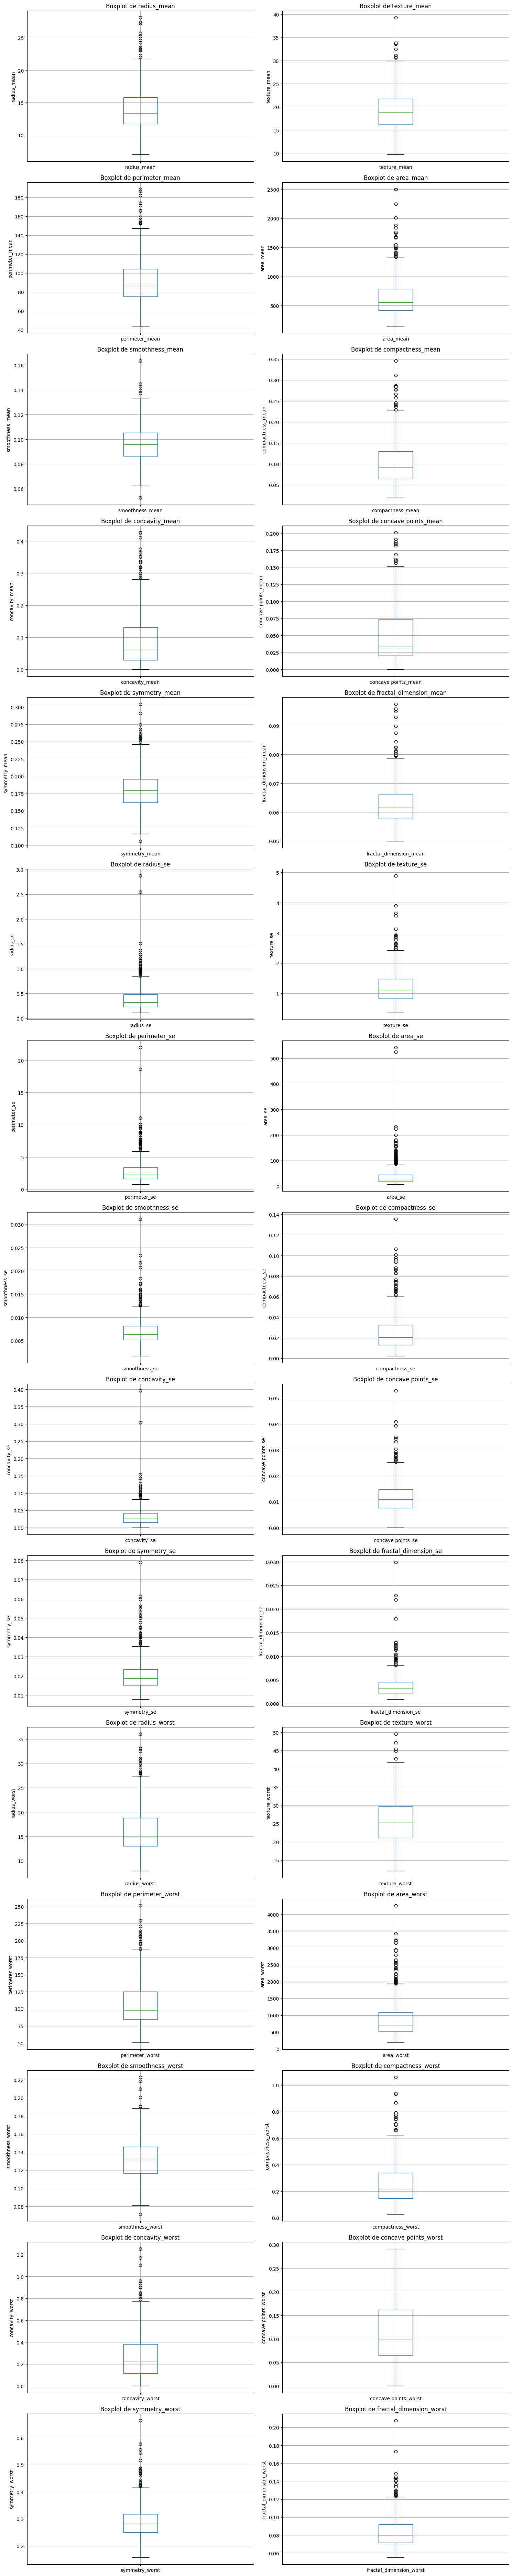

In [216]:
#Identificando outliers
# Definindo o número de gráficos (N) e o layout das subplots
atributos = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

n = len(atributos)
cols = 2  # Número de colunas por linha
rows = -(-n // cols)  # Calcula o número de linhas necessário (arredondando para cima)

# Criando a figura e as subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Ajusta o tamanho com base no número de linhas
axes = axes.flatten()  # Transforma as subplots em um array para fácil iteração

# Plotando os gráficos
for i, attr in enumerate(atributos):
    dados_cancer.boxplot(column=attr, ax=axes[i])
    axes[i].set_title(f'Boxplot de {attr}')
    axes[i].set_ylabel(attr)


# Removendo subplots vazias (se N não for múltiplo de cols)
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# for attr in labels_atributos:
#   fig = dados_cancer.boxplot(column=attr)
#   fig.set_title('')
#   fig.set_ylabel(attr)

Identifica os **5 atributos** com os **outliers mais extremos** em um conjunto de dados.
Para isso, são calculados os **valores absolutos** dos outliers em relação aos **limites inferior** e **superior** de cada atributo. Com isso é possível determinar os **maiores desvios**

In [217]:
# Dicionário para armazenar os valores máximos absolutos de outliers por atributo
outliers_magnitude = {}

# Calculando os outliers
for attr in atributos:
    boxplot_data = dados_cancer[attr]
    Q1 = boxplot_data.quantile(0.25)
    Q3 = boxplot_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Valores absolutos dos outliers em relação aos limites
    outliers = boxplot_data[(boxplot_data < lower_bound) | (boxplot_data > upper_bound)]
    if not outliers.empty:
        lower_diff = abs(outliers - lower_bound)  # Diferença para o limite inferior
        upper_diff = abs(outliers - upper_bound)  # Diferença para o limite superior
        max_diff = max(lower_diff.max(), upper_diff.max())  # Máximo absoluto
        outliers_magnitude[attr] = max_diff

# Identificar os 4 atributos com os maiores valores absolutos de outliers
top_outliers_magnitude = sorted(outliers_magnitude.items(), key=lambda x: x[1], reverse=True)[:5]

# Exibindo os resultados
print("Os 5 atributos com os outliers mais extremos:")
for atributo, magnitude in top_outliers_magnitude:
    print(f"{atributo}: valor absoluto máximo do outlier = {magnitude:.2f}")


Os 5 atributos com os outliers mais extremos:
area_worst: valor absoluto máximo do outlier = 4591.75
area_mean: valor absoluto máximo do outlier = 2624.30
area_se: valor absoluto máximo do outlier = 565.36
perimeter_worst: valor absoluto máximo do outlier = 229.03
perimeter_mean: valor absoluto máximo do outlier = 156.72


# **Removendo Outliers**

**Calcula** os **limites** de detecção de **outliers** para diferentes **atributos** do conjunto de dados de câncer, utilizando o método do Intervalo **Interquartil** (IQR). Ele identifica valores que estão além de 3 vezes o IQR abaixo ou acima dos quartis 1 (Q1) e 3 (Q3).



**Atributos analisados:**

**area_mean**: Média da área das células tumorais.

**area_worst**: Maior valor da área das células tumorais.

**perimeter_mean**: Média do perímetro das células tumorais.

**perimeter_worst**: Maior valor do perímetro das células tumorais.

In [218]:
#intervalo interquartil
IQR = dados_cancer.area_mean.quantile(0.75) - dados_cancer.area_mean.quantile(0.25)
Lower_fence = dados_cancer.area_mean.quantile(0.25) - (IQR * 3)
Upper_fence = dados_cancer.area_mean.quantile(0.75) + (IQR * 3)
print('area_mean outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
IQR = dados_cancer.area_worst.quantile(0.75) - dados_cancer.area_worst.quantile(0.25)
Lower_fence = dados_cancer.area_worst.quantile(0.25) - (IQR * 3)
Upper_fence = dados_cancer.area_worst.quantile(0.75) + (IQR * 3)
print('area_worst outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
IQR = dados_cancer.perimeter_mean.quantile(0.75) - dados_cancer.perimeter_mean.quantile(0.25)
Lower_fence = dados_cancer.perimeter_mean.quantile(0.25) - (IQR * 3)
Upper_fence = dados_cancer.perimeter_mean.quantile(0.75) + (IQR * 3)
print('perimeter_mean outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
IQR = dados_cancer.perimeter_worst.quantile(0.75) - dados_cancer.perimeter_worst.quantile(0.25)
Lower_fence = dados_cancer.perimeter_worst.quantile(0.25) - (IQR * 3)
Upper_fence = dados_cancer.perimeter_worst.quantile(0.75) + (IQR * 3)
print('perimeter_worst outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

area_mean outliers are values < -666.9000000000001 or > 1869.9
area_worst outliers are values < -1190.8000000000002 or > 2790.1000000000004
perimeter_mean outliers are values < -11.619999999999976 or > 190.89
perimeter_worst outliers are values < -39.76000000000002 or > 249.27000000000004


Antes da remoção dos outliers, utilizo o shape para exibir a quantidade de linhas por colunas, evidenciando que ainda não houve uma remoção de valores do dataframe a fim de remover os outliers

In [219]:
dados_cancer.shape

(569, 31)

Nesse momento é feita a **substituição dos valores máximos** dos **atributos** area_mean, area_worst, perimeter_mean, perimeter_worst com o **valor de Upper_fence** capturados anteriormente

In [220]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [dados_cancer]:
    df3['area_mean'] = max_value(df3, 'area_mean', 1869.9)
    df3['area_worst'] = max_value(df3, 'area_worst', 2790.1)
    df3['perimeter_mean'] = max_value(df3, 'perimeter_mean', 190.89)
    df3['perimeter_worst'] = max_value(df3, 'perimeter_worst', 249.27)

Evidenciando que o maior valor de area_mean foi substituido corretamente

In [221]:
dados_cancer.area_mean.max()


1869.9

Evidenciando que o maior valor de area_worst foi substituido corretamente

In [222]:
dados_cancer.area_worst.max()


2790.1

Evidenciando que o maior valor de perimeter_mean foi substituido corretamente

In [223]:
dados_cancer.perimeter_mean.max()


188.5

Evidenciando que o maior valor de perimeter_worst foi substituido corretamente

In [224]:
dados_cancer.perimeter_worst.max()

249.27

Descrição dos atributos em **comparação** ao describe anterior que exibiu um desvio maior, mas que agora após a **remoção dos outliers**, a somatória das **distancias de cada atributo ficou menor**

In [225]:
dados_cancer.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,651.745870,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.257821,874.259227,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,338.371201,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.588081,542.664198,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,1869.900000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,249.270000,2790.100000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Preparação dos dados - treino ; teste com holdout**

Preparação dos dados de treino e teste. Utilizado **30%** do conjunto de dados para **teste** e **70**% para **treinamento** do modelo.

In [226]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
dados_cancer.diagnosis = [1 if each == "M" else 0 for each in dados_cancer.diagnosis]
X = dados_cancer.drop(["diagnosis"], axis=1)
y = dados_cancer.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Exibe que foi separado **70**% dos dados para **treino**

In [227]:
#Exibe quantidada shape do treino
X_train.shape

(398, 30)

Exibe que foi separado **30**% dos dados para **teste**

In [228]:
#Exibe quantidada shape do treino
X_test.shape

(171, 30)

In [229]:
X.shape

(569, 30)

# **Definição dos Algoritmos**

Nesse momento começa a se falar de **modelo**, independente de qual é o melhor deles para a resolução do problema. Utilizado o **KNN**, **CART**, **NB** e **SVM**, pois foram modelos apresentados durante as aulas

In [230]:
# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# **Balanceamento das Classes**

A distribuição das classes não está perfeitamente balanceada, pois a classe (0 - Benigno) corresponde a aproximadamente 62,74%, enquanto a outra (1 - Maligno) tem 37,26%. Isso nos mostra um leve desbalanceamento.

In [231]:
print("Distribuição das classes:")
print(dados_cancer['diagnosis'].value_counts(normalize=True))

Distribuição das classes:
diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


In [232]:
smote = SMOTE(random_state=seed)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [233]:
# Exibindo a nova distribuição das classes no conjunto de treino balanceado
print("Distribuição das classes após balanceamento com SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))


Distribuição das classes após balanceamento com SMOTE:
diagnosis
0    0.5
1    0.5
Name: proportion, dtype: float64


In [234]:
#Exibe quantidada shape do treino
X_train_balanced.shape

(500, 30)

# **Importância dos atributos**

In [235]:
model = RandomForestClassifier()
model.fit(X_train_balanced, y_train_balanced)
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

radius_worst               0.129326
concave points_worst       0.121259
perimeter_worst            0.118842
concave points_mean        0.096735
area_worst                 0.090202
concavity_worst            0.080070
area_mean                  0.056679
perimeter_mean             0.056012
concavity_mean             0.049158
radius_mean                0.047801
texture_worst              0.016939
area_se                    0.015223
texture_mean               0.014162
compactness_worst          0.013295
concavity_se               0.012634
smoothness_worst           0.012340
perimeter_se               0.011060
radius_se                  0.009361
compactness_mean           0.008753
smoothness_mean            0.005138
fractal_dimension_worst    0.005086
symmetry_mean              0.004933
symmetry_worst             0.004543
compactness_se             0.004028
fractal_dimension_se       0.003941
smoothness_se              0.003383
concave points_se          0.002897
texture_se                 0

In [236]:
threshold = 0.01  # Exemplo de corte
selected_features = importances[importances > threshold].index
X_train_balanced = X_train_balanced[selected_features]
X_test = X_test[selected_features]
print(selected_features)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se',
       'concavity_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


# **Modelagem com Pipeline**

Comparar o desempenho de diferentes algoritmos de aprendizado de máquina (KNN, CART, Naive Bayes, SVM) aplicados a três versões do conjunto de dados:

**Original**

**Padronizado**

**Normalizado**

A análise permite determinar qual transformação e algoritmo são mais eficazes para o problema em questão.


**Métricas de Desempenho:**

**RMSE** (Root Mean Squared Error): Raiz quadrada do erro médio quadrático, indicando a precisão do modelo.

**MSE** (Mean Squared Error): Erro médio quadrático, mede o erro absoluto.

**Desvio Padrão**: Mede a variabilidade dos resultados.

In [237]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_balanced, y_train_balanced, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: rmse: %.3f mse: %.3f desvio: (%.3f)" % (name, np.sqrt(cv_results.mean()), cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

KNN-orig: rmse: 0.973 mse: 0.946 desvio: (0.022)
CART-orig: rmse: 0.969 mse: 0.938 desvio: (0.040)
NB-orig: rmse: 0.975 mse: 0.950 desvio: (0.034)
SVM-orig: rmse: 0.952 mse: 0.906 desvio: (0.046)
KNN-padr: rmse: 0.986 mse: 0.972 desvio: (0.026)
CART-padr: rmse: 0.974 mse: 0.948 desvio: (0.036)
NB-padr: rmse: 0.982 mse: 0.964 desvio: (0.033)
SVM-padr: rmse: 0.987 mse: 0.974 desvio: (0.018)
KNN-norm: rmse: 0.985 mse: 0.970 desvio: (0.029)
CART-norm: rmse: 0.977 mse: 0.954 desvio: (0.031)
NB-norm: rmse: 0.982 mse: 0.964 desvio: (0.033)
SVM-norm: rmse: 0.988 mse: 0.976 desvio: (0.017)


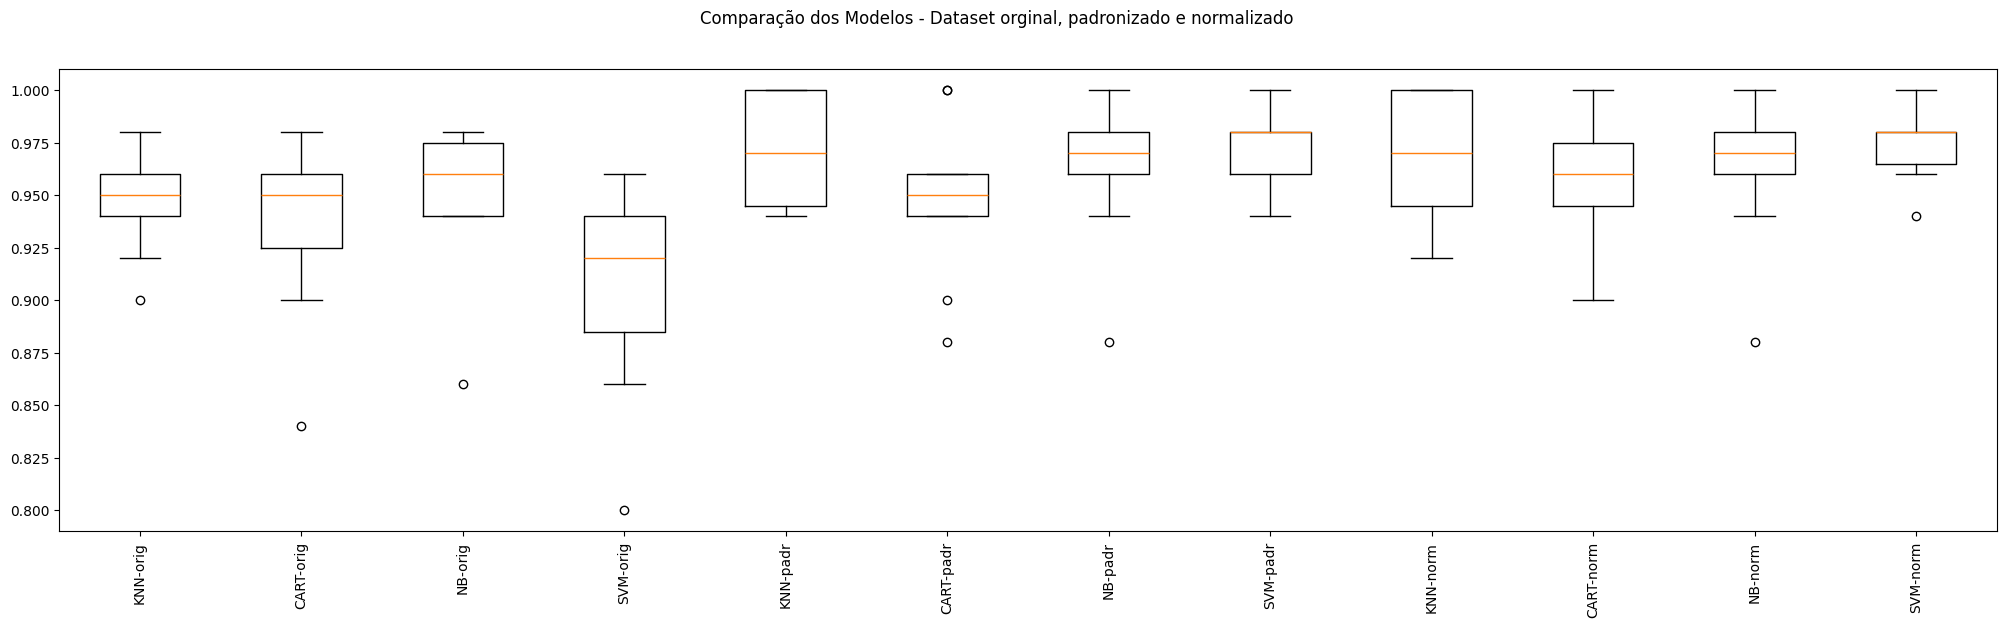

In [238]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# **Transformação**

Criação de instâncias dos transformadores **StandardScaler** e **MinMaxScaler**, para pré-processar dados antes de treinar os modelos. O intuito é** melhorar a performance e a convergência dos modelos**.

**StandardScaler**: padroniza os dados, ajustando-os para terem média 0 e desvio padrão 1.

**MinMaxScaler**: normaliza os dados para um intervalo específico, [0, 1].

In [239]:
# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# **Otimização de hiperparâmetros com o modelo escolhido**

**Realiza** o ajuste fino (**tuning**) do algoritmo KNN utilizando GridSearchCV para explorar diferentes hiperparâmetros e combinações de pré-processamento (dados originais, padronizados e normalizados).

In [240]:
# Tuning do KNN
np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train_balanced, y_train_balanced)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.958000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-padr - Melhor: 0.982000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.982000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}


A **métrica** **Manhattan** foi escolhida porque **proporcionou uma melhor separação entre as classes do dataset**, refletindo uma correspondência mais eficaz com a distribuição dos dados e as transformações aplicadas.

# **Finalizando Modelo**

**Avalia** a **performance** do **modelo** de Regressão Logística em prever rótulos no conjunto de teste, **garantindo que a padronização dos dados** não introduza viés e **mantenha a consistência no processo de treino e teste**.

In [241]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train_balanced) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train_balanced) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train_balanced)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9707602339181286


# **Teste pratico de classificação com novos dados**

In [242]:
# Certifique-se de que os novos dados contenham apenas as características selecionadas
novos_dados = novos_dados[selected_features]

# Padronizar os novos dados com o mesmo scaler usado no treinamento
rescaled_novos_dados = scaler.transform(novos_dados)

# Fazer previsões com o modelo treinado
predicoes = model.predict(rescaled_novos_dados)

# Exibir resultados
print("Resultados da classificação para novos dados:")
for i, pred in enumerate(predicoes):
    print(f"Dado {i + 1}: {'Maligno' if pred == 1 else 'Benigno'}")


Resultados da classificação para novos dados:
Dado 1: Maligno
Dado 2: Maligno


In [243]:
print("Colunas dos novos dados:", novos_dados.columns)
print("Colunas esperadas pelo modelo:", selected_features)


Colunas dos novos dados: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se',
       'concavity_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')
Colunas esperadas pelo modelo: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se',
       'concavity_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


# **Avaliação e comparação dos resultados**

In [244]:

# Previsões no conjunto de teste
y_pred_teste = model.predict(rescaledTestX)

# Relatório de classificação
print("Relatório de classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_teste, target_names=["Benigno", "Maligno"]))

# Matriz de confusão
print("Matriz de confusão no conjunto de teste:")
print(confusion_matrix(y_test, y_pred_teste))

# Comparação de acurácia
print("\nComparação de acurácia:")
print(f"Acurácia no treino: {model.score(rescaledX, y_train_balanced):.2f}")
print(f"Acurácia no teste: {accuracy_score(y_test, y_pred_teste):.2f}")


Relatório de classificação no conjunto de teste:
              precision    recall  f1-score   support

     Benigno       0.97      0.98      0.98       107
     Maligno       0.97      0.95      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Matriz de confusão no conjunto de teste:
[[105   2]
 [  3  61]]

Comparação de acurácia:
Acurácia no treino: 0.98
Acurácia no teste: 0.97


# **Resumo final**

O modelo demonstra ser uma boa solução para o problema de classificação de câncer de mama para um primeiro MVP. Há sim mais espaço para aprimoramento com mais dados (senti falta disso...), ajustes adicionais e validações mais robustas(conforme evolue XP).













In [245]:
print('Obrigado! ;)')

Obrigado! ;)
